### Downloading the Price datasets


##### TVL from DeFi Lama
BTC: https://defillama.com/chain/Bitcoin <br>
ETH: https://defillama.com/chain/Ethereum <br>
SOL: https://defillama.com/chain/Solana

##### Wikipedia Page Views
ALL: https://pageviews.wmcloud.org/

### **DEPENDENCIES**

In [1]:
# Basic Stack 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib

# Changing the working directory
path = ('P:/6. DSMA/99. Thesis/Github/thesis')
os.chdir(path)

# Import the module
sys.path.append('P:/6. DSMA/99. Thesis/Github/thesis/scripts')
import pipeline_crypto_prices
from pipeline_crypto_prices import get_prices
#from camel import thesis_add_index
import camel
import sentiment_analyzer_v2
importlib.reload(pipeline_crypto_prices)
importlib.reload(camel)
importlib.reload(sentiment_analyzer_v2)

[scatterd] >WARNING> From C:\Users\mulle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



<module 'sentiment_analyzer_v2' from 'P:\\6. DSMA/99. Thesis/Github/thesis/scripts\\sentiment_analyzer_v2.py'>

### **RAW DATA**

##### 1. CRYPTO, INDEX, STOCK, AND VIX

In [2]:
btc = get_prices(start_date='2018-01-01')
eth = get_prices('ETH-USD', start_date='2018-01-01')
sol = get_prices('SOL-USD', start_date='2018-01-01')
snp = get_prices('SNP', start_date='2018-01-01', percent_change=True, index=True)
dow = get_prices('Dow', start_date='2018-01-01', percent_change=True, index=True)
vix = get_prices('Vix', start_date='2018-01-01', percent_change=True, index=True).drop('Vix_Volume', axis=1)
gold = get_prices('Gold', start_date='2018-01-01', percent_change=True, index=True)
oil = get_prices('Oil', start_date='2018-01-01', percent_change=True, index=True)
nvidia = get_prices('NVDA', start_date='2018-01-01', percent_change=True, index=True)

Data for BTC-USD from 2018-01-01 to 2024-07-18 has been downloaded successfully
Data for ETH-USD from 2018-01-01 to 2024-07-18 has been downloaded successfully
Data for SOL-USD from 2018-01-01 to 2024-07-18 has been downloaded successfully
Data for SNP from 2018-01-01 to 2024-07-18 has been downloaded successfully
Data for Dow from 2018-01-01 to 2024-07-18 has been downloaded successfully
Data for Vix from 2018-01-01 to 2024-07-18 has been downloaded successfully


P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:156: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Returns'] = df['Close'].pct_change()
P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:159: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df = df.apply(lambda x: x.pct_change() if x.name not in ['Date','Returns'] else x)
P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:156: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values

Data for Gold from 2018-01-01 to 2024-07-18 has been downloaded successfully
Data for Oil from 2018-01-01 to 2024-07-18 has been downloaded successfully
Data for NVDA from 2018-01-01 to 2024-07-18 has been downloaded successfully


In [3]:
Index = pd.merge(snp, dow, on='Date')
Index = pd.merge(Index, vix, on='Date')
Index = pd.merge(Index, gold, on='Date')
Index = pd.merge(Index, oil, on='Date')
Index = pd.merge(Index, nvidia, on='Date')

Index = Index.dropna()
Index.tail(4)

,Date,SNP_Returns,SNP_Volume,Dow_Returns,Dow_Volume,Vix_Returns,Gold_Returns,Gold_Volume,Oil_Returns,Oil_Volume,NVDA_Returns,NVDA_Volume
2385,2024-07-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2386,2024-07-15,0.002826,-0.021569,0.005270,-0.051875,0.052970,0.003687,6.500000,-0.003649,-0.085295,-0.006190,-0.173647
2387,2024-07-16,0.006389,0.116363,0.018471,-0.008061,0.005335,0.016303,-0.827778,-0.014040,0.039343,-0.016194,0.030929
2388,2024-07-17,-0.013928,0.050644,0.005948,0.414700,0.097801,-0.003086,0.000000,0.025879,0.000000,-0.066239,0.804046


##### 2. GTRENDS AND WIKIPEDIA

1. Wikipedia
https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2018-01-01&end=2024-07-09&pages=Bitcoin|Solana|Ethereum|Cryptocurrency|Crypto|Blockchain#

2. Google Trends
https://trends.google.com/trends/explore?date=2024-01-01%202024-07-08&q=crypto&hl=en

Weekly: https://trends.google.com/trends/explore?date=2018-01-01%202024-07-09&q=crypto&hl=en

// Below code loads in all Google Trends Datasets, and the Wikipedia data set and merges them all together

In [4]:
#Gtrends Data
g_btc = pd.read_csv('data/raw/ext/daily/btc_gtrends.csv', header=1)
g_btc.rename(columns={'bitcoin: (Worldwide)': 'BTC_Gtrends'}, inplace=True)
g_eth = pd.read_csv('data/raw/ext/daily/eth_gtrends.csv', header=1)
g_eth.rename(columns={'ethereum: (Worldwide)': 'ETH_Gtrends'}, inplace=True)
g_sol = pd.read_csv('data/raw/ext/daily/sol_gtrends.csv', header=1)
g_sol.rename(columns={'solana: (Worldwide)': 'SOL_Gtrends'}, inplace=True)
g_crypto = pd.read_csv('data/raw/ext/daily/crypto_gtrends.csv', header=1)
g_crypto.rename(columns={'crypto: (Worldwide)': 'Crypto_Gtrends'}, inplace=True)

# Merging all trends data
all_gtrends = pd.merge(g_btc, g_eth, on='Day')
all_gtrends = pd.merge(all_gtrends, g_sol, on='Day')
all_gtrends = pd.merge(all_gtrends, g_crypto, on='Day')
all_gtrends['Total_Gtrends'] = all_gtrends.BTC_Gtrends + all_gtrends.ETH_Gtrends + all_gtrends.SOL_Gtrends + all_gtrends.Crypto_Gtrends
all_gtrends = all_gtrends[['Day', 'Total_Gtrends']]

print(f'Minimum Date: {all_gtrends.Day.min()}')
print(f'Maximum Date: {all_gtrends.Day.max()}')

Minimum Date: 2024-01-01
Maximum Date: 2024-07-18


In [5]:
# Wikipedia Data
wp = pd.read_csv('data/raw/ext/daily/wp.csv')
wp['Total_WP'] = wp['Bitcoin'] + wp['Solana'] + wp['Ethereum'] + wp['Cryptocurrency'] + wp['Crypto'] + wp['Blockchain']
wp = wp[['Date', 'Total_WP']]
#Final External 
all_ext = pd.merge(wp, all_gtrends, left_on='Date', right_on='Day')
all_ext.drop(['Day'], axis=1, inplace=True)
all_ext

# Apply percentage change to the columns
all_ext = camel.convert_to_percentage_change(all_ext, 'Date')
all_ext.Date = pd.to_datetime(all_ext.Date)
#all_ext_pca = camel.pca_v2(all_ext, blacklist=['Date'], n_components=4, n_feat=7)
#all_ext_pca['Date'] = all_ext['Date'].reset_index(drop=True)

print(f'Minimum Date: {all_ext.Date.min()}')
print(f'Maximum Date: {all_ext.Date.max()}')
#all_ext.tail(4)

Minimum Date: 2024-01-02 00:00:00
Maximum Date: 2024-07-17 00:00:00


##### 3. REDDIT SENTIMENT DATA

--__ Extra: https://www.aaii.com/sentimentsurvey/sent_results -> weekly historic sentiment figures

In [22]:
from datetime import datetime

btc_reddit = pd.read_csv('data/raw/reddit/BTC_R.csv')
#btc_reddit.date_posted = pd.to_datetime(btc_reddit.date_posted, format='%m/%d/%Y', errors='coerce')

# Define a list of possible date formats
date_formats = ['%m/%d/%Y', '%d/%m/%Y', '%Y-%m-%d', '%d-%b-%Y', '%b %d, %Y']

# Function to convert date with multiple formats
def try_parsing_date(date_string):
    for fmt in date_formats:
        try:
            return datetime.strptime(date_string, fmt)
        except ValueError:
            pass
    return None

# Apply the function to the dataframe
btc_reddit['date_posted'] = btc_reddit['date_posted'].apply(lambda x: try_parsing_date(x))



eth_reddit = pd.read_csv('data/raw/reddit/ETH_R.csv')
eth_reddit['date_posted'] = eth_reddit['date_posted'].apply(lambda x: try_parsing_date(x))
sol_reddit = pd.read_csv('data/raw/reddit/SOL_R.csv')
sol_reddit.date_posted = pd.to_datetime(sol_reddit.date_posted)

sol_reddit.date_posted.max()

Timestamp('2024-07-18 00:00:00')

In [23]:
sol_reddit

,subreddit,title,selftext,upvote_ratio,ups,downs,score,comments,date_posted,pull_date
0,solana,Welcome to /r/Solana - Read This To Get Started,\n\n\# Welcome to /r/solana \- Please Read Th...,0.99,714,0,714,43,2019-07-26,00:00.0
1,solana,Bonk DAO Invests in Solana's Growth,NaN,0.90,7,0,7,1,2024-02-02,00:00.0
2,solana,solana mobile preorder failed after the succes...,I preordered the Solana Mobile 2 on Solana Mob...,0.87,6,0,6,2,2024-02-04,00:00.0
3,solana,Weekly Summary | January 26 To February 2,NaN,1.00,6,0,6,2,2024-02-02,00:00.0
4,solana,Solana Is Now An Option For Donating &amp; Rec...,**Source:** [https://twitter.com/Giveth/status...,1.00,6,0,6,1,2024-02-02,00:00.0
...,...,...,...,...,...,...,...,...,...,...
15788,solana,Meme's web pages how they create it,Hi. I want to ask if all these funny but quite...,0.82,7,0,7,9,2024-07-14,7/18/2024
15789,solana,Best Rug checker and new coins,After months using rug check.xyz to find new v...,0.86,5,0,5,7,2024-07-14,7/18/2024
15790,solana,Can I receive an a irdrop into my Photon Wallet?,I bought a token a few weeks ago and now I und...,1.00,5,0,5,3,2024-07-14,7/18/2024
15791,solana,Jitosol liquid staking,I'm a little confused. I've been doing some re...,0.71,3,0,3,5,2024-07-14,7/18/2024


In [24]:
btc_reddit_sen = sentiment_analyzer_v2.main(btc_reddit)
eth_reddit_sen = sentiment_analyzer_v2.main(eth_reddit)
sol_reddit_sen = sentiment_analyzer_v2.main(sol_reddit)

Pre-Processing Text...


Processing Text: 100%|██████████| 15163/15163 [00:37<00:00, 406.42it/s]


Applying Sentiment Analysis...


Analyzing Sentiment: 100%|██████████| 15163/15163 [00:05<00:00, 2745.06it/s]


Overall weighted average sentiment score: 0.1311
Pre-Processing Text...


Processing Text: 100%|██████████| 15740/15740 [00:37<00:00, 415.26it/s]


Applying Sentiment Analysis...


Analyzing Sentiment: 100%|██████████| 15740/15740 [00:05<00:00, 2778.52it/s]


Overall weighted average sentiment score: 0.2048
Pre-Processing Text...


Processing Text: 100%|██████████| 15793/15793 [00:44<00:00, 357.00it/s]


Applying Sentiment Analysis...


Analyzing Sentiment: 100%|██████████| 15793/15793 [00:05<00:00, 2822.27it/s]

Overall weighted average sentiment score: 0.1212


In [25]:
btc_reddit_sen.date = pd.to_datetime(btc_reddit_sen.date)
btc_reddit_sen = btc_reddit_sen[btc_reddit_sen['date'] >= '2024-02-01']
print(f'Maximum Date: {btc_reddit_sen.date.max()}')

eth_reddit_sen.date = pd.to_datetime(eth_reddit_sen.date)
eth_reddit_sen = eth_reddit_sen[eth_reddit_sen['date'] >= '2024-02-01']
print(f'Maximum Date: {eth_reddit_sen.date.max()}')

sol_reddit_sen.date = pd.to_datetime(sol_reddit_sen.date)
sol_reddit_sen = sol_reddit_sen[sol_reddit_sen['date'] >= '2024-02-01']
print(f'Maximum Date: {sol_reddit_sen.date.max()}')

Maximum Date: 2024-07-18 00:00:00
Maximum Date: 2024-07-18 00:00:00
Maximum Date: 2024-07-18 00:00:00


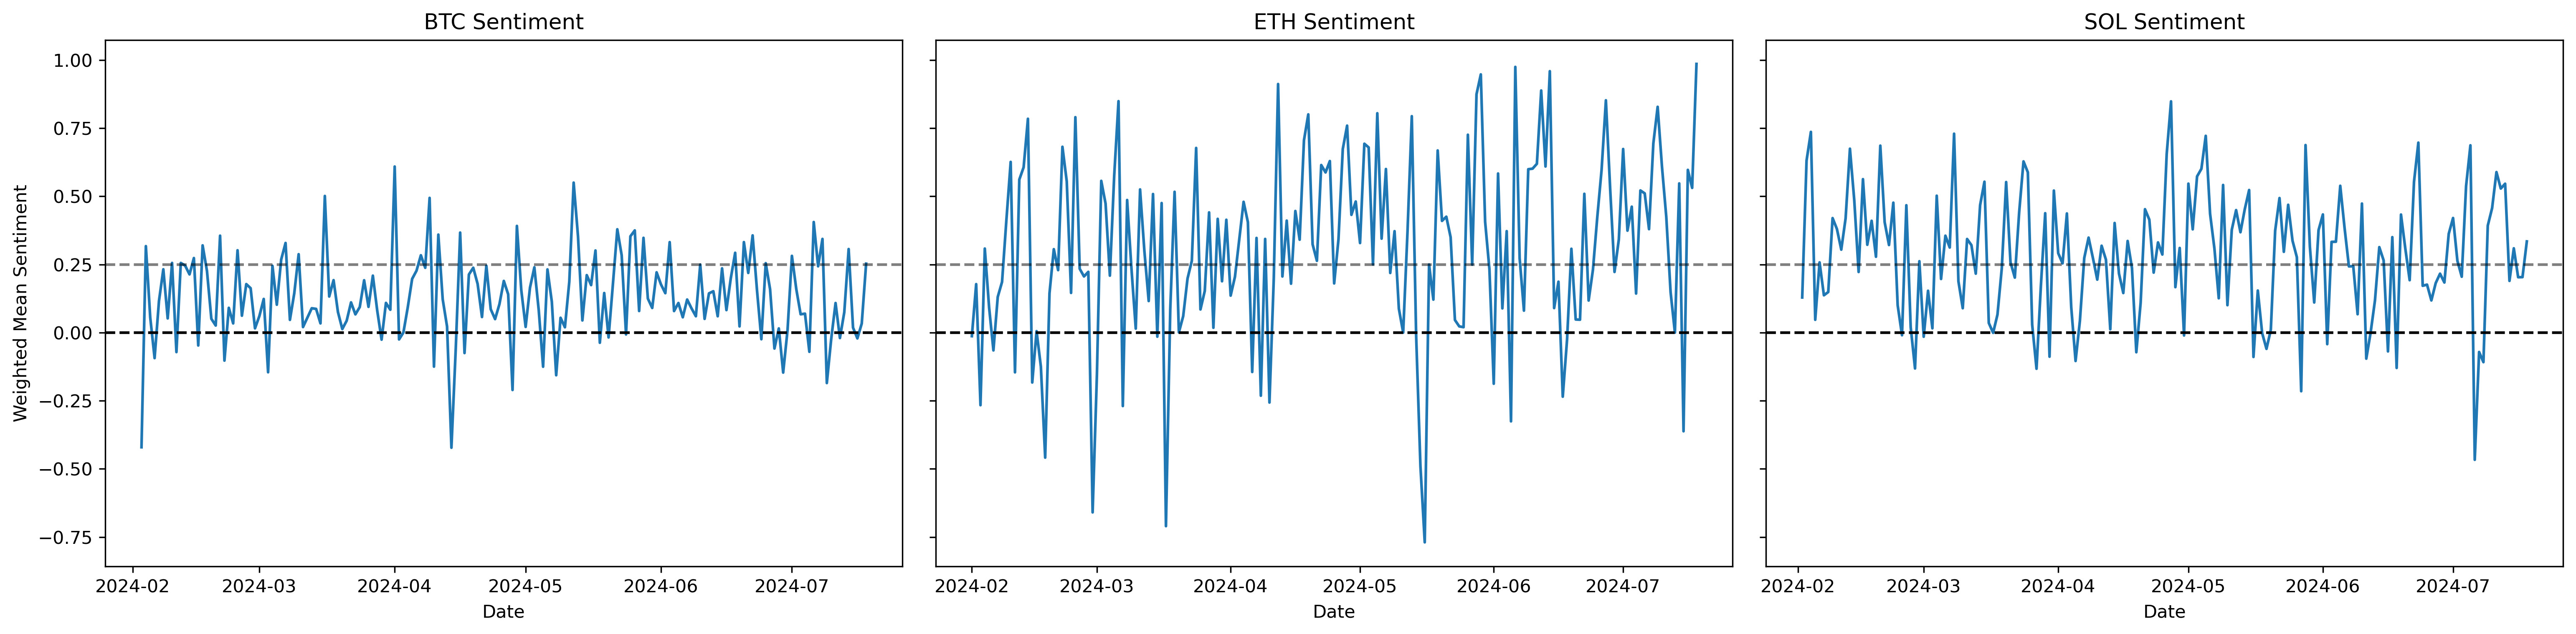

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True, dpi=310)  # Create a figure with 3 subplots side by side
titles = ['BTC Sentiment', 'ETH Sentiment', 'SOL Sentiment']  # Titles for each subplot

for idx, df in enumerate([btc_reddit_sen, eth_reddit_sen, sol_reddit_sen]):
    ax = axes[idx]
    ax.plot(df['date'], df['weighted_mean_sentiment'])
    ax.set_title(titles[idx])
    ax.axhline(y=0, color='black', linestyle='--')
    ax.axhline(y=0.25, color='black', linestyle='--', alpha=0.5)
    ax.set_xlabel('Date')
    if idx == 0:
        ax.set_ylabel('Weighted Mean Sentiment')  # Only label the y-axis on the first subplot

plt.tight_layout()
plt.show()

##### 4. TVL

In [27]:
btc_tvl = pd.read_csv('data/raw/tvl/btc_tvl.csv')
eth_tvl = pd.read_csv('data/raw/tvl/eth_tvl.csv')
sol_tvl = pd.read_csv('data/raw/tvl/sol_tvl.csv')

def tvl_pro(df):
    df = df[:1]
    df = df.melt(var_name='Date', value_name='TVL')
    df = df.drop(index=0).reset_index(drop=True)
    df.Date = pd.to_datetime(df.Date, dayfirst=True)
    return df

btc_tvl, eth_tvl, sol_tvl = tvl_pro(btc_tvl), tvl_pro(eth_tvl), tvl_pro(sol_tvl)
btc_tvl.TVL, eth_tvl.TVL, sol_tvl.TVL = btc_tvl['TVL'].pct_change(), eth_tvl['TVL'].pct_change(), sol_tvl['TVL'].pct_change()

btc_tvl.tail(4)


C:\Users\mulle\AppData\Local\Temp\ipykernel_18560\1321332755.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  btc_tvl.TVL, eth_tvl.TVL, sol_tvl.TVL = btc_tvl['TVL'].pct_change(), eth_tvl['TVL'].pct_change(), sol_tvl['TVL'].pct_change()


,Date,TVL
1212,2024-07-16,0.039275
1213,2024-07-17,0.009232
1214,2024-07-18,0.007785
1215,2024-07-19,0.000000


### **PROCESSING DATA**

#### 1. TECHNICAL ANALYSIS & PCA

**Input:** 
1. BTC, ETH, and SOL Price Data

**Output:** 
1. Dataframe with all technical indicators for all cryptos condensed to 4 columns
2. Seperate dataframe per crypto with its own Technical Indicators and Trend Determinisitc Technical Indicators


In [28]:
# Make a copy of the dataframe to avoid modifying the original
btc_1 = btc.copy()
eth_1 = eth.copy()
sol_1 = sol.copy()

# Apply technical analysis
btc_1 = camel.technical_analysis(btc, price_col = 'Close', hold_strat=False, only_td=True)
eth_1 = camel.technical_analysis(eth, price_col = 'Close', hold_strat=False, only_td=True)
sol_1 = camel.technical_analysis(sol_1, price_col = 'Close', hold_strat=False, only_td=True)

##### Dimensionality Reduction

In [29]:
# Apply first PCA per dataset
btc_pca = camel.pca_v2(btc_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
eth_pca = camel.pca_v2(eth_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
sol_pca = camel.pca_v2(sol_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)

# Apply another round of PCA for combined database.
btc_pca['Date'] = btc_1['Date'].reset_index(drop=True)
eth_pca['Date'] = eth_1['Date'].reset_index(drop=True)
sol_pca['Date'] = sol_1['Date'].reset_index(drop=True)

#Merge all and add suffixes
btc_pca = btc_pca.rename(columns={'PC1': 'PC1_btc', 'PC2': 'PC2_btc', 'PC3': 'PC3_btc', 'PC4': 'PC4_btc'})
eth_pca = eth_pca.rename(columns={'PC1': 'PC1_eth', 'PC2': 'PC2_eth', 'PC3': 'PC3_eth', 'PC4': 'PC4_eth'})
sol_pca = sol_pca.rename(columns={'PC1': 'PC1_sol', 'PC2': 'PC2_sol', 'PC3': 'PC3_sol', 'PC4': 'PC4_sol'})

pca = pd.merge(btc_pca, eth_pca, on='Date')
pca = pd.merge(pca, sol_pca, on='Date')

pca = camel.pca_v2(pca, blacklist=['Date'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
## This dataset has full technical indicators compressed into 4 variables with 77% explained

pca['Date'] = btc_1['Date'].reset_index(drop=True)

pca

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Merging

In [30]:
btc_m = pd.merge(btc_1, Index, on='Date')
btc_m = pd.merge(btc_m, all_ext, on='Date')
btc_m = pd.merge(btc_m, btc_reddit_sen, left_on='Date', right_on='date')
btc_m = pd.merge(btc_m, btc_tvl, on='Date')

eth_m = pd.merge(eth_1, Index, on='Date')
eth_m = pd.merge(eth_m, all_ext, on='Date')
eth_m = pd.merge(eth_m, eth_reddit_sen, left_on='Date', right_on='date')
eth_m = pd.merge(eth_m, eth_tvl, on='Date')

sol_m = pd.merge(sol_1, Index, on='Date')
sol_m = pd.merge(sol_m, all_ext, on='Date')
sol_m = pd.merge(sol_m, sol_reddit_sen, left_on='Date', right_on='date')
sol_m = pd.merge(sol_m, sol_tvl, on='Date')

btc_m = camel.thesis_dv(btc_m, hold_strat=False)
btc_m.to_csv('data/processed/camel_v3_btc.csv')

eth_m = camel.thesis_dv(eth_m, hold_strat=False)
eth_m.to_csv('data/processed/camel_v3_eth.csv')

sol_m = camel.thesis_dv(sol_m, hold_strat=False)
sol_m.to_csv('data/processed/camel_v3_sol.csv')

In [31]:
btc_m

,Date,High,Low,Close,Volume,Returns,MA_td,3MA_td,%K_td,%D_td,...,NVDA_Returns,NVDA_Volume,Total_WP,Total_Gtrends,date,weighted_mean_sentiment,unweighted_mean_sentiment,ups,TVL,Indicator
0,2024-02-03,43359.941406,42890.808594,42992.250000,-0.399627,-0.004483,1,1,0,1,...,0.000000,0.000000,-0.009118,-0.125000,2024-02-03,-0.420672,-0.246525,1415,-0.002535,Sell
1,2024-02-04,43097.644531,42374.832031,42583.582031,0.325266,-0.009506,0,0,0,0,...,0.000000,0.000000,0.073535,0.010204,2024-02-04,0.317289,0.324842,2578,-0.008993,Buy
2,2024-02-05,43494.250000,42264.816406,42658.667969,0.264370,0.001763,0,0,0,0,...,0.047944,0.427003,0.060539,0.101010,2024-02-05,0.055301,0.166072,7037,-0.010539,Buy
3,2024-02-06,43344.148438,42529.019531,43084.671875,-0.102429,0.009986,1,1,1,0,...,-0.015996,0.004460,0.221910,0.073394,2024-02-06,-0.093616,0.204164,11204,-0.002255,Buy
4,2024-02-07,44341.949219,42775.957031,44318.222656,0.257649,0.028631,1,1,1,1,...,0.027498,-0.274532,-0.180723,-0.051282,2024-02-07,0.115744,0.286744,10555,0.018552,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2024-07-13,59787.078125,57796.441406,59231.953125,-0.332935,0.023014,1,0,1,1,...,0.000000,0.000000,-0.125743,-0.072072,2024-07-13,0.074802,0.229826,8683,0.007151,Buy
161,2024-07-14,61329.527344,59225.250000,60787.792969,0.301132,0.026267,1,0,1,1,...,0.000000,0.000000,0.150974,0.145631,2024-07-14,0.306644,0.359969,2171,0.017834,Buy
162,2024-07-15,64870.152344,60704.929688,64870.152344,0.714162,0.067158,1,1,1,1,...,-0.006190,-0.173647,0.030239,0.101695,2024-07-15,0.018416,0.253324,6603,0.046219,Buy
163,2024-07-16,65354.339844,62487.968750,65097.148438,0.092476,0.003499,1,1,0,1,...,-0.016194,0.030929,0.022646,0.030769,2024-07-16,-0.021236,0.161870,5581,0.039275,Sell
